# Collatz conjecture
![picture](https://drive.google.com/uc?id=1hrVr5KVxpUkDveLbHVprV3NpDDSPGlxO)

Matematico tedesco Lothar Collatz:


*   Inizia con qualsiasi numero intero positivo 𝑛
*   Se 𝑛 è pari, si divide per 2.
*   Se 𝑛 è dispari, si moltiplica per 3 e si aggiunge 1.
*   Si ripete la procedura con il nuovo valore 𝑛, indefinitamente.

La congettura afferma che, indipendentemente dal numero intero positivo con cui si inizia, alla fine si raggiunge sempre il numero 1.

[Premio per la soluzione](https://www.prnewswire.com/news-releases/bakuage-offers-prize-of-120-million-jpy-to-whoever-solves-collatz-conjecture-math-problem-unsolved-for-84-years-301326629.html)

[ 235  706  353 1060  530  265  796  398  199  598  299  898  449 1348
  674  337 1012  506  253  760  380  190   95  286  143  430  215  646
  323  970  485 1456  728  364  182   91  274  137  412  206  103  310
  155  466  233  700  350  175  526  263  790  395 1186  593 1780  890
  445 1336  668  334  167  502  251  754  377 1132  566  283  850  425
 1276  638  319  958  479 1438  719 2158 1079 3238 1619 4858 2429 7288
 3644 1822  911 2734 1367 4102 2051 6154 3077 9232 4616 2308 1154  577
 1732  866  433 1300  650  325  976  488  244  122   61  184   92   46
   23   70   35  106   53  160   80   40   20   10    5   16    8    4
    2    1]


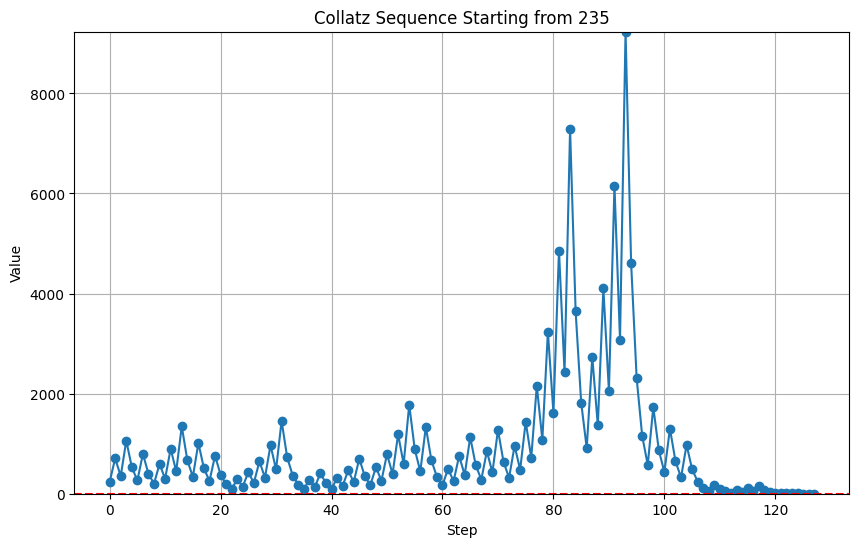

In [ ]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt

# Definiamo una TensorFlow function
@tf.function
def collatz_step(n):
    return tf.where(tf.equal(n % 2, 0), n // 2, 3 * n + 1)

# Funzione per calcolare la Collatz sequence
@tf.function
def collatz_sequence(n):
    # Inizializza un tensor array per memorizzare la sequence
    seq = tf.TensorArray(tf.int32, size=0, dynamic_size=True)
    i = 0

    # Loop fino a quando n non arriva ad 1 (halt?!)
    while n != 1:
        seq = seq.write(i, n)
        n = collatz_step(n)
        i += 1

    # aggiunge uno alla fine
    seq = seq.write(i, n)

    return seq.stack()

# crea un numero random da 1 and 100
random_number = random.randint(1, 1000)

start_number = tf.constant(random_number, dtype=tf.int32)
collatz_seq = collatz_sequence(start_number).numpy()


print(collatz_seq)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(collatz_seq, marker='o')
plt.title(f'Collatz Sequence Starting from {start_number.numpy()}')
plt.xlabel('Step')
plt.ylabel('Value')
plt.ylim(bottom=0)  #  y parte da 0

# limite per y ad 1 per visibilità
plt.ylim(bottom=min(collatz_seq) - 1, top=max(collatz_seq) + 1)

# Linea orizzontale per y=1
plt.axhline(y=1, color='r', linestyle='--', label='y = 1')
plt.grid(True)
plt.show()
